In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [14]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 8:2
df = pd.read_csv('SKX.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [15]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)
# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [17]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[46.42665509 46.43833615 46.45001721 46.46169826 46.47337932 46.48506037
 46.49674143 46.50842249 46.52010354 46.5317846  46.54346566 46.55514671
 46.56682777 46.57850882 46.59018988 46.60187094 46.61355199 46.62523305
 46.6369141  46.64859516 46.66027622 46.67195727 46.68363833 46.69531939
 46.70700044 46.7186815  46.73036255 46.74204361 46.75372467 46.76540572]


In [18]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_squared_error
def calculate_mse(y_test, y_pred):
  return mean_squared_error(y_test, y_pred)
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mse = calculate_mse(y_val, y_pred_val)
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mse = calculate_mse(y_test, y_pred)
test_mae = mean_absolute_error(y_test,y_pred)
print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

Validation RMSE: 1.805026961877779
Validation MSE: 3.258122333105725
Validation MAE: 1.805026961877779
Testing RMSE: 5.489803656882661
Testing MSE: 30.13794419112224
Testing MAE: 4.583243152561363


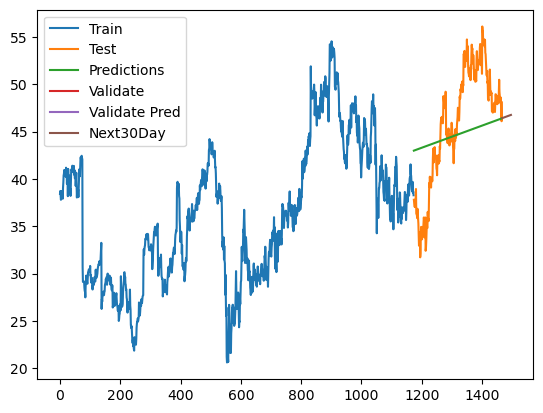

In [19]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_val)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Validate Pred','Next30Day'])
plt.show()

In [20]:
test_data.index

RangeIndex(start=1174, stop=1467, step=1)